# Tour of Scikit Learn


## Import Packages

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
# Create Features and Target
X = iris.data[:, [2, 3]]
y = iris.target
print(f"Class Labels: {np.unique(y)}")

Class Labels: [0 1 2]


In [9]:
# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=31415926, stratify=y)
print(f"Labels counts in y: {np.bincount(y)}")
print(f"Labels counts in y_train: {np.bincount(y_train)}")
print(f"Labels counts in y_test: {np.bincount(y_test)}")

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [11]:
# Standardize features
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

**One-Versus-Rest(OvR)**

In [13]:
# Fit the model
ppn = Perceptron(eta0=0.1, random_state=31415926)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=31415926)

In [15]:
# Make Predictions
y_pred = ppn.predict(X_test_std)
print(f"Misclassified examples: {(y_test != y_pred).sum()}")

Misclassified examples: 9


In [17]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")

Accuracy: 0.800


In [19]:
# Function to Plot decision regions
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # Setup markers generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan']
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # Plot decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # Plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1], 
                    alpha=0.8, 
                    c=colors[idx], 
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')
        
    # Highlight test examples
    if test_idx:
        # Plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], 
                    X_test[:, 1], 
                    c='none', 
                    edgecolor='black', 
                    alpha=1.0, 
                    linewidth=1, 
                    marker='o', 
                    s=100, 
                    label='Test set')

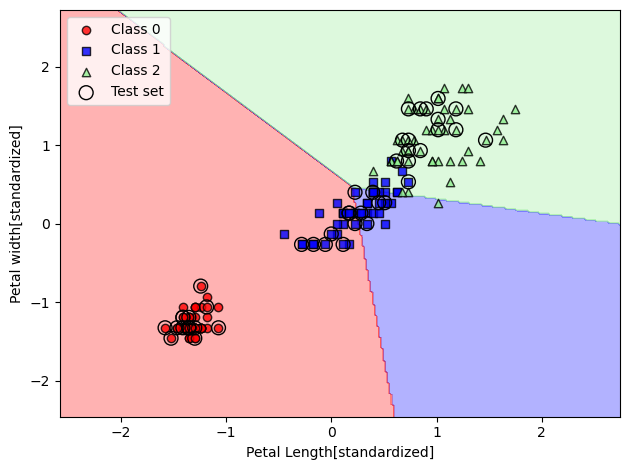

In [20]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, 
                      y=y_combined, 
                      classifier=ppn, 
                      test_idx=range(105, 150))
plt.xlabel('Petal Length[standardized]')
plt.ylabel('Petal width[standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show();

## Logistic Regression

**Logistic Sigmoid function**

- Conditional Probability of an event (Patient has a certain disease) given set of symptoms(x): $p:=p(y=1|x)$ 
- Odds: Odds in favor of a particular event is $\frac{p}{(1-p)}$
- Logit of odds: Natural logarithm of odds $log\frac{p}{(1-p)}$
- Assumption of Logistic Model: Linear relationship between weighted input and the log-odds. $logit(p) = w_1x_1 + ... w_mx_m + b = \sum_{i=j}w_jx_j + b = w^Tx + b$
- Logit function maps probability ot real-number range, hence inverse of logit function will map real-number range to [0, 1] i.e range of probability.
- Inverse of Logit function is called Logistic Sigmoid Function: $\sigma(z) = \frac{1}{e^{-z}}$ where $z = w^Tx + b$
- Output of a sigmoid function interpreted as the probability of sample belonging to class 1.

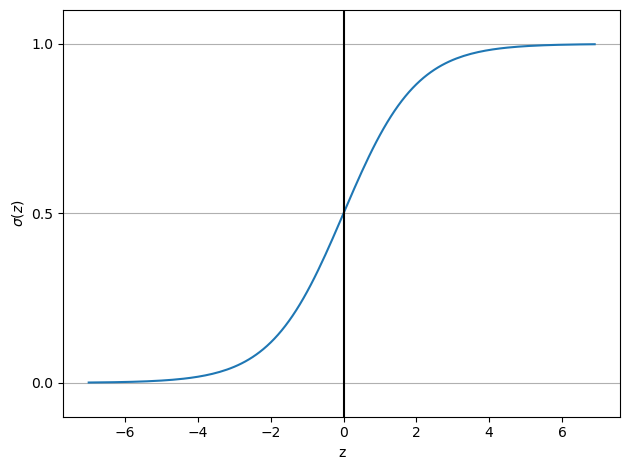

In [21]:
# Plot Sigmoid function
# Define sigmoid function
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))
z = np.arange(-7, 7, 0.1)
sigma_z = sigmoid(z)
plt.plot(z, sigma_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\sigma (z)$')
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show();

**Learning the model weights via Logistic Loss Function.**

*Likelihood Function*

- For a binary classification problem, the class label can be considered as Bernoulli Variable.
- A Bernoulli Random Variable can take two values 0 and 1 with probability p of being 1.
- For a single data point: $P(Y=1|X=x^{(i)}) = \sigma(z^{(i)})$ and $P(Y=0|X=x^{(i)}) = 1 - \sigma(z^{(i)})$

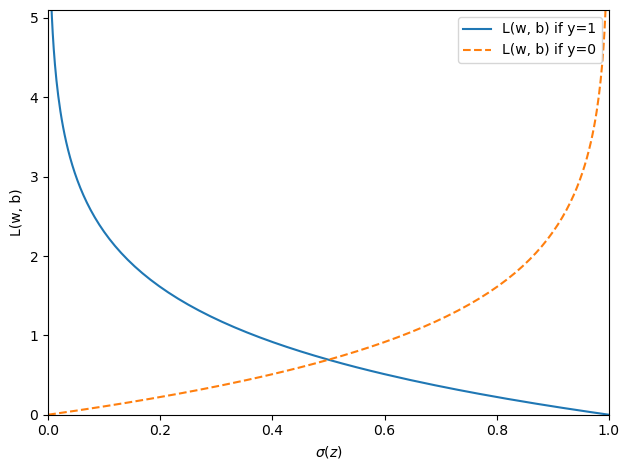

In [22]:
# Loss of classifying a single training example for different values of sigmoid(z)
def loss_1(z):
    return -np.log(sigmoid(z))

def loss_0(z):
    return -np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
sigma_z = sigmoid(z)
c1 = [loss_1(x) for x in z]
plt.plot(sigma_z, c1, label='L(w, b) if y=1')
c0 = [loss_0(x) for x in z]
plt.plot(sigma_z, c0, linestyle='--', label='L(w, b) if y=0')
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\sigma(z)$')
plt.ylabel('L(w, b)')
plt.legend(loc='best')
plt.tight_layout()
plt.show();

In [23]:
# Implement Logistic Regression
class LogisticRegressionSGD:
    """
    Gradient descent based logistic regression
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=31415926):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        """
        Fit Training Data
        :param X: 
        :param y: 
        :return: 
        """
        rgen = np.random.RandomState(self.random_state)
        self.w = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b = np.float_(0.)
        self.losses = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b += self.eta * 2.0 * errors.mean()
            loss = (-y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))) / X.shape[0])
            self.losses.append(loss)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w) + self.b
    
    def activation(self, z):
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

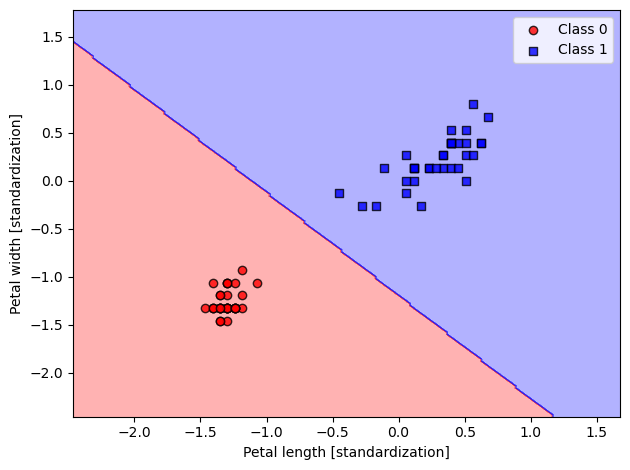

In [24]:
# Fit LogisticRegressionSGD on binary classification task
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]
lrgd = LogisticRegressionSGD(eta=0.3, 
                             n_iter=1000)
lrgd.fit(X_train_01_subset, y_train_01_subset)
plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=lrgd)
plt.xlabel('Petal length [standardization]')
plt.ylabel('Petal width [standardization]')
plt.legend()
plt.tight_layout()
plt.show();

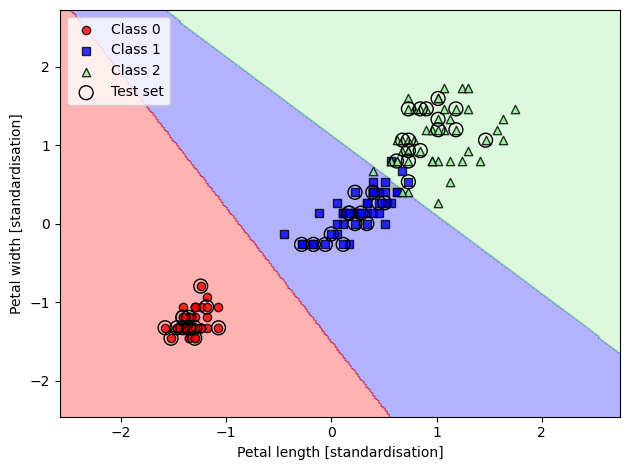

In [26]:
# Training Logistic Regression with Scikit-Learn
lr = LogisticRegression(C=100.0, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel('Petal length [standardisation]')
plt.ylabel('Petal width [standardisation]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show();

In [27]:
# Predict probabilities of first 3 examples
lr.predict_proba(X_test_std[:3, :])

array([[8.22972102e-01, 1.77027898e-01, 5.24915581e-14],
       [8.22972102e-01, 1.77027898e-01, 5.24915581e-14],
       [2.96069240e-05, 8.94045387e-01, 1.05925006e-01]])

In [28]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([0, 0, 1], dtype=int64)

In [29]:
# More convenient
lr.predict(X_test_std[:3, :])

array([0, 0, 1])

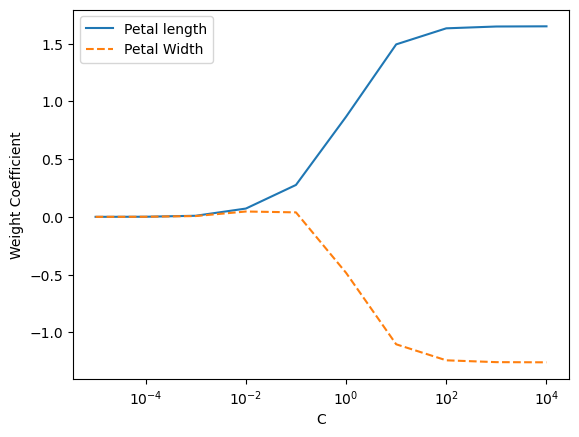

In [30]:
# Inspect effect of C parameter in LogisticRegression
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, multi_class='ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)
weights = np.array(weights)
plt.plot(params, weights[:, 0], label='Petal length')
plt.plot(params, weights[:, 1], linestyle='--', label='Petal Width')
plt.ylabel('Weight Coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show();

## Support Vector Machine

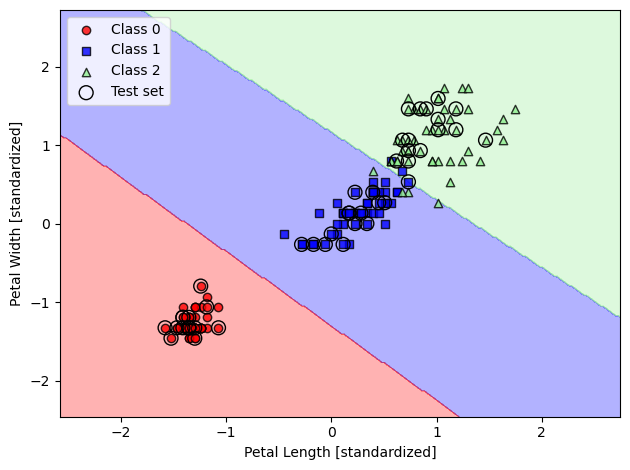

In [31]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=31415926)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('Petal Length [standardized]')
plt.ylabel('Petal Width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show();

### Kernel Methods for linearly inseparable data

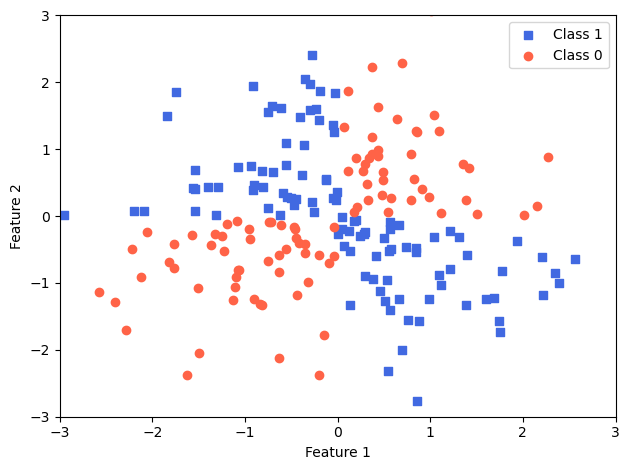

In [32]:
# XOR dataset with random noise
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, 0)
plt.scatter(X_xor[y_xor == 1, 0], 
            X_xor[y_xor == 1, 1], 
            c='royalblue', 
            marker='s', 
            label='Class 1')
plt.scatter(X_xor[y_xor == 0, 0], 
            X_xor[y_xor == 0, 1], 
            c='tomato', 
            marker='o', 
            label='Class 0')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show();

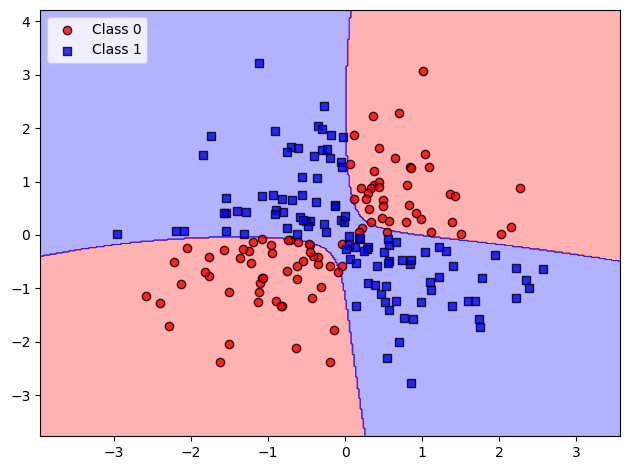

In [33]:
# Train SVM with Kernel Trick for XOR Dataset
svm = SVC(kernel='rbf', random_state=31415926, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show();

### Investigate effect of gamma

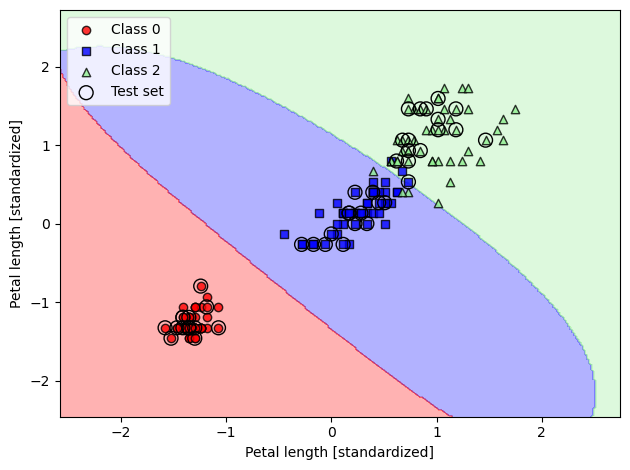

In [34]:
# Train SVM with Kernel trick on Iris dataset
svm = SVC(kernel='rbf', gamma=0.2, C=1.0, random_state=31415926)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, 
                      y_combined, 
                      classifier=svm, 
                      test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show();

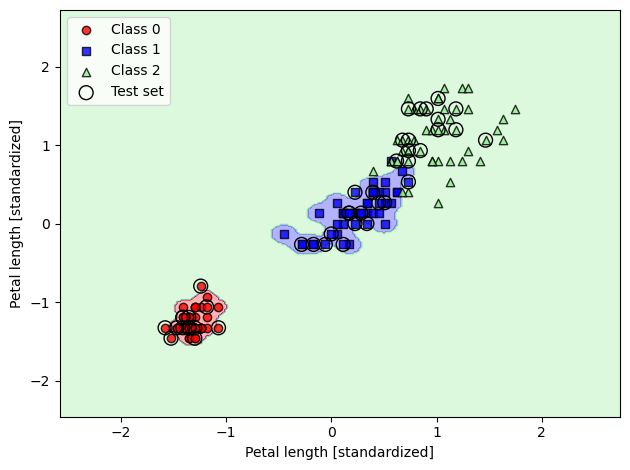

In [35]:
# Train SVM with Kernel trick on Iris dataset with increased gamma
svm = SVC(kernel='rbf', gamma=100.0, C=1.0, random_state=31415926)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, 
                      y_combined, 
                      classifier=svm, 
                      test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show();

## Decision Tree Learning